# Problem definition

## Airbnb Price Prediction with Machine Learning



**Airbnb** is a marketplace for short-term rentals that allows hosts to list part or all of their living space for others to book. The platform includes everything from private rooms to entire houses. Thanks to its flexibility and competitive prices, Airbnb has become one of the main alternatives to hotels worldwide. Since its founding in 2008, the company has grown exponentially: it went public in December 2020 with a valuation of about **\$47 billion**, and as of 2025 its market capitalization exceeds **\$85 billion**, making it more valuable than most global hotel chains.



### The Pricing Challenge

One of the biggest challenges for hosts is setting the optimal nightly price. In many cities, travelers are presented with a wide variety of listings and can filter by criteria such as:

- price  
- number of bedrooms  
- property type  
- location  

Because Airbnb is a competitive marketplace, the amount a host can charge is directly tied to supply and demand dynamics.  

- If a host sets a price much higher than the local average, guests will likely choose cheaper but similar alternatives.  
- If the price is set too low, the host loses potential revenue.  




### A Simple Strategy



A straightforward approach to pricing could be:  

1. Identify similar listings.  
2. Compute the average price among them.  
3. Use that value as a reference price.  

While simple, this strategy does not fully capture the complexity of the marketplace.




### Machine Learning for Price Prediction



The process of using existing data to predict future outcomes is called machine learning. In our case, we want to use local listing data to predict the ideal nightly rate.  

In this lesson, we will explore a **regularized linear regression model** (implemented in the [mlops repository](https://github.com/ivanovitchm/mlops)).  

This model fits a mathematical function to the available data, capturing relationships between multiple features—such as number of bedrooms, location, and property type—and estimating their impact on the final price. Unlike simple averaging strategies, regression provides a more systematic way to generalize and make robust predictions across different scenarios.  




### Next Step



Before diving deeper into the model, let’s first become familiar with the dataset we’ll be working with.


# Introduction to the data


While AirBnB does not release official data on the listings available in their marketplace, an independent initiative called [Inside AirBnB](https://insideairbnb.com/rio-de-janeiro/) has extracted and published data on a sample of listings for many major cities featured on the platform.  

In this lesson, we will work with their dataset from **March 2025**, focusing on the listings from **Rio de Janeiro, Brazil**, the world-renowned capital of Samba. Here is a [direct link to the dataset](https://data.insideairbnb.com/brazil/rj/rio-de-janeiro/2025-03-19/data/listings.csv.gz). Each row in this dataset corresponds to a specific property available for short-term rental on AirBnB in Rio de Janeiro.

To make the dataset easier to manage, we have removed many of the original 100+ columns. Below are the selected columns we will keep for our analysis:

- **host_response_rate**: the response rate of the host  
- **host_acceptance_rate**: percentage of requests to the host that convert into rentals  
- **host_listings_count**: number of other listings managed by the host  
- **latitude**: latitude of the property’s geographic coordinates  
- **longitude**: longitude of the property’s geographic coordinates  
- **city**: the city where the property is located  
- **zipcode**: the postal code of the property  
- **state**: the state where the property is located  
- **accommodates**: the number of guests the property can host  
- **room_type**: the type of accommodation (Private room, Shared room, or Entire home/apt)  
- **bedrooms**: number of bedrooms included in the rental  
- **bathrooms**: number of bathrooms available  
- **beds**: number of beds included  
- **price**: nightly rental price  
- **cleaning_fee**: additional fee charged for cleaning after the guest’s stay  
- **security_deposit**: refundable security deposit in case of damages  
- **minimum_nights**: minimum number of nights required for a booking  
- **maximum_nights**: maximum number of nights allowed for a booking  
- **number_of_reviews**: total number of reviews left by past guests  

Let’s load this dataset into Pandas and begin exploring it in more detail.


In [ ]:
# Use wget to download the dataset
!wget -O listings.csv.gz "https://data.insideairbnb.com/brazil/rj/rio-de-janeiro/2025-03-19/data/listings.csv.gz"

# Unzip the .gz file (-k keeps the original .gz file)
!gunzip -k listings.csv.gz

--2025-10-20 00:02:57--  https://data.insideairbnb.com/brazil/rj/rio-de-janeiro/2025-03-19/data/listings.csv.gz
Resolving data.insideairbnb.com (data.insideairbnb.com)... 99.84.215.94, 99.84.215.23, 99.84.215.119, ...
Connecting to data.insideairbnb.com (data.insideairbnb.com)|99.84.215.94|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 21857120 (21M) [application/x-gzip]
Saving to: ‘listings.csv.gz’

listings.csv.gz     100%[===================>]  20.84M  25.6MB/s    in 0.8s    

2025-10-20 00:02:58 (25.6 MB/s) - ‘listings.csv.gz’ saved [21857120/21857120]



In [ ]:
# Now you have the "listings.csv" file available in Colab
import pandas as pd
pd.set_option('display.max_columns', None)

df = pd.read_csv("listings.csv")
df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,availability_eoy,number_of_reviews_ly,estimated_occupancy_l365d,estimated_revenue_l365d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2302715,https://www.airbnb.com/rooms/2302715,20250319150537,2025-03-20,city scrape,guilherme,"House with five large bedrooms, living room, g...",NaN,https://a0.muscache.com/pictures/30842883/b19c...,11706874,https://www.airbnb.com/users/show/11706874,Guilherme,2014-01-27,"Rio, Brazil",NaN,NaN,NaN,NaN,f,https://a0.muscache.com/im/users/11706874/prof...,https://a0.muscache.com/im/users/11706874/prof...,NaN,2.0,2.0,"['email', 'phone']",t,f,NaN,Anil,NaN,-22.95221,-43.32944,Entire home,Entire home/apt,12,5.0,5 baths,5.0,10.0,"[""Washer"", ""Hot tub"", ""Breakfast"", ""TV with st...","$2,700.00",10,30,10,10,30,30,10.0,30.0,NaN,t,30,60,90,365,2025-03-20,0,0,0,287,0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN
1,2304688,https://www.airbnb.com/rooms/2304688,20250319150537,2025-03-20,city scrape,OLIMPÍADAS 2016,"Apartment with living room, 2 bedrooms and kit...","Beaches, restaurants, supermarkets, amusement ...",https://a0.muscache.com/pictures/30867360/fe14...,10405816,https://www.airbnb.com/users/show/10405816,Eurico,2013-12-03,"Rio de Janeiro, Brazil",NaN,NaN,NaN,0%,f,https://a0.muscache.com/im/users/10405816/prof...,https://a0.muscache.com/im/users/10405816/prof...,NaN,1.0,1.0,"['email', 'phone']",t,f,"Rio, Rio de Janeiro, Brazil",Ipanema,NaN,-22.98767,-43.18991,Entire rental unit,Entire home/apt,4,1.0,1 bath,2.0,3.0,"[""Washer"", ""TV with standard cable"", ""Wifi"", ""...",$837.00,7,14,7,7,14,14,7.0,14.0,NaN,t,30,60,90,365,2025-03-20,0,0,0,287,0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN
2,2306547,https://www.airbnb.com/rooms/2306547,20250319150537,2025-03-20,city scrape,Amplo Apto com 3 Dormitórios em Copacabana - 1...,Excellent apartment in Copacabana. Cozy and la...,The Copacabana Neighborhood is independent an...,https://a0.muscache.com/pictures/4923e99d-7190...,4107346,https://www.airbnb.com/users/show/4107346,Vera Lucia,2012-11-09,"Rio de Janeiro, Brazil",Sou uma pessoa que adora receber turistas no R...,within a few hours,100%,62%,f,https://a0.muscache.com/im/users/4107346/profi...,https://a0.muscache.com/im/users/4107346/profi...,Copacabana,1.0,1.0,"['email', 'phone']",t,t,"Copacabana, Rio de Janeiro, Brazil",Copacabana,NaN,-22.97333,-43.18857,Entire rental unit,Entire home/apt,7,2.0,2 baths,3.0,6.0,"[""Dedicated workspace"", ""Dishes and silverware...",$800.00,5,90,5,5,90,90,5.0,90.0,NaN,t,25,47,77,257,2025-03-20,13,3,1,257,4,30,24000.0,2020-01-07,2025-03-05,5.00,5.00,4.92,5.00,4.92,5.00,4.77,NaN,f,1,1,0,0,0.21
3,2306767,https://www.airbnb.com/rooms/2306767,20250319150537,2025-03-20,city scrape,Studio 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42013 entries, 0 to 42012
Data columns (total 79 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            42013 non-null  int64  
 1   listing_url                                   42013 non-null  object 
 2   scrape_id                                     42013 non-null  int64  
 3   last_scraped                                  42013 non-null  object 
 4   source                                        42013 non-null  object 
 5   name                                          42013 non-null  object 
 6   description                                   40982 non-null  object 
 7   neighborhood_overview                         16819 non-null  object 
 8   picture_url                                   42013 non-null  object 
 9   host_id                                       42013 non-null 

In [ ]:
df['first_review']

,first_review
0,NaN
1,NaN
2,2020-01-07
3,2014-03-25
4,2014-06-26
...,...
42008,NaN
42009,NaN
42010,NaN
42011,NaN


In [ ]:
'first_review','last_review', 'room_type', 'neighbourhood_cleansed', 'description'

('first_review',
 'last_review',
 'room_type',
 'neighbourhood_cleansed',
 'description')

In [ ]:
df.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,availability_eoy,number_of_reviews_ly,estimated_occupancy_l365d,estimated_revenue_l365d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,4.201300e+04,4.201300e+04,4.201300e+04,42008.000000,42008.000000,0.0,42013.000000,42013.000000,42013.000000,38313.000000,41373.000000,38335.000000,42013.000000,42013.000000,42013.000000,42013.000000,42013.000000,42013.000000,42013.000000,42013.000000,0.0,42013.000000,42013.000000,42013.000000,42013.000000,42013.000000,42013.000000,42013.000000,42013.000000,42013.000000,42013.000000,3.835600e+04,33140.000000,33139.000000,33140.000000,33139.000000,33139.000000,33139.000000,33139.000000,0.0,42013.000000,42013.000000,42013.000000,42013.000000,33140.000000
mean,7.444710e+17,2.025032e+13,2.256052e+08,14.052466,24.933775,NaN,-22.966277,-43.248424,3.959394,1.497834,1.522297,2.357454,3.609526,366.076738,3.335920,4.209340,452.462071,480.008950,3.653403,463.654781,NaN,17.359175,36.676672,59.122367,188.777878,23.684859,8.113965,0.981268,161.185157,6.993169,49.724823,2.076935e+04,4.802137,4.816212,4.768009,4.886694,4.879855,4.857481,4.719113,NaN,9.338990,8.446433,0.777997,0.110156,1.263767
std,5.391705e+17,1.367985e+01,2.103432e+08,65.168438,141.331902,NaN,0.035432,0.100336,2.273275,0.971862,1.022382,2.116851,14.249756,379.761816,12.611217,14.462273,428.464379,436.574343,12.928592,426.924469,NaN,11.403082,21.049260,30.761915,128.669915,45.877236,12.482438,1.387351,101.939147,12.096823,69.011854,5.803371e+04,0.389698,0.381337,0.424701,0.313860,0.324846,0.318360,0.432712,NaN,24.426124,24.239087,2.130291,1.194582,1.277616
min,1.787800e+04,2.025032e+13,3.607000e+03,1.000000,1.000000,NaN,-23.073830,-43.723009,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.010000
25%,4.625830e+07,2.025032e+13,3.500060e+07,1.000000,1.000000,NaN,-22.984390,-43.300392,2.000000,1.000000,1.000000,1.000000,1.000000,45.000000,1.000000,2.000000,80.000000,89.000000,1.500000,89.000000,NaN,6.000000,19.000000,39.000000,76.000000,1.000000,0.000000,0.000000,72.000000,0.000000,0.000000,0.000000e+00,4.760000,4.790000,4.710000,4.890000,4.890000,4.840000,4.660000,NaN,1.000000,1.000000,0.000000,0.000000,0.320000
50%,9.494565e+17,2.025032e+13,1.501449e+08,2.000000,3.000000,NaN,-22.971860,-43.193719,4.000000,1.000000,1.000000,2.000000,2.000000,365.000000,2.000000,3.000000,365.000000,365.000000,2.000000,365.000000,NaN,20.000000,42.000000,70.000000,173.000000,6.000000,2.000000,0.000000,167.000000,1.000000,18.000000,6.156000e+03,4.920000,4.930000,4.900000,5.000000,5.000000,4.960000,4.830000,NaN,2.000000,1.000000,0.000000,0.000000,0.930000
75%,1.236132e+18,2.025032e+13,4.149635e+08,6.000000,9.000000,NaN,-22.952710,-43.184728,5.000000,2.000000,2.000000,3.000000,3.000000,365.000000,3.000000,4.000000,1125.000000,1125.000000,3.000000,1125.000000,NaN,29.000000,56.000000,86.000000,329.000000,26.000000,11.000000,2.000000,268.000000,9.000000,72.000000,2.416050e+04,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,NaN,5

## Changes in target_columns

In [ ]:
# Select only the relevant columns from the original dataframe 'df'
# These columns include property features (e.g., accommodates, bathrooms, bedrooms)
# and booking information (e.g., minimum_nights, maximum_nights, number_of_reviews, price).

target_columns = [
    "accommodates",      # Number of guests the property can host
    "bathrooms",         # Number of bathrooms available
    "bedrooms",          # Number of bedrooms available
    "beds",              # Number of beds available
    "minimum_nights",    # Minimum nights required for a booking
    "maximum_nights",    # Maximum nights allowed for a booking
    "number_of_reviews", # Total reviews given by past guests
    'first_review',
    'last_review',
    'room_type',
    'neighbourhood_cleansed',
    'description',
    "price"              # Nightly rental price
]

# Create a new dataframe called 'rio_listings' with only the selected columns
# Using .copy() ensures that we are working with an independent dataframe
# instead of just a view of the original data.

rio_listings = df[target_columns].copy()

# Display a five rows sample of the new dataframe to quickly check the data
rio_listings.sample(5)

,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,number_of_reviews,first_review,last_review,room_type,neighbourhood_cleansed,description,price
28945,4,1.0,1.0,1.0,2,60,23,2024-07-08,2025-03-06,Entire home/apt,Centro,⚡️ SAMBÓDROMO - 5 minutes walk <br />STREET C...,$181.00
37241,2,1.0,1.0,1.0,1,30,2,2025-01-01,2025-03-05,Private room,Copacabana,"Room with Queen bed, minibar in simple and coz...",$720.00
37654,4,1.0,1.0,2.0,5,28,1,2025-03-05,2025-03-05,Entire home/apt,Centro,"One Bedroom/Charming Room with double bed, dou...",$502.00
20658,8,NaN,3.0,NaN,3,30,1,2025-01-18,2025-01-18,Entire home/apt,Copacabana,"Relax with the whole family in this quiet, spa...",NaN
21837,3,1.0,1.0,1.0,5,8,2,2024-01-03,2025-01-01,Entire home/apt,Copacabana,"Renovated apartment, located in a family build...",$800.00


# Clean, Prepare & Manipulate Data

In [ ]:
# Generate descriptive statistics
rio_listings.describe()

,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,number_of_reviews
count,42013.000000,38313.000000,41373.000000,38335.000000,42013.000000,42013.000000,42013.000000
mean,3.959394,1.497834,1.522297,2.357454,3.609526,366.076738,23.684859
std,2.273275,0.971862,1.022382,2.116851,14.249756,379.761816,45.877236
min,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,2.000000,1.000000,1.000000,1.000000,1.000000,45.000000,1.000000
50%,4.000000,1.000000,1.000000,2.000000,2.000000,365.000000,6.000000
75%,5.000000,2.000000,2.000000,3.000000,3.000000,365.000000,26.000000
max,16.000000,20.000000,30.000000,56.000000,1000.000000,1125.000000,726.000000


In [ ]:
# Check missing values
rio_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42013 entries, 0 to 42012
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   accommodates            42013 non-null  int64  
 1   bathrooms               38313 non-null  float64
 2   bedrooms                41373 non-null  float64
 3   beds                    38335 non-null  float64
 4   minimum_nights          42013 non-null  int64  
 5   maximum_nights          42013 non-null  int64  
 6   number_of_reviews       42013 non-null  int64  
 7   first_review            33140 non-null  object 
 8   last_review             33140 non-null  object 
 9   room_type               42013 non-null  object 
 10  neighbourhood_cleansed  42013 non-null  object 
 11  description             40982 non-null  object 
 12  price                   38356 non-null  object 
dtypes: float64(3), int64(4), object(6)
memory usage: 4.2+ MB


In [ ]:
# Remove any rows containing missing values across the selected columns
rio_listings.dropna(axis=0, inplace=True)

In [ ]:
rio_listings[['first_review','last_review', 'number_of_reviews']]

,first_review,last_review,number_of_reviews
2,2020-01-07,2025-03-05,13
3,2014-03-25,2025-03-03,193
4,2014-06-26,2025-03-01,28
5,2019-01-02,2025-01-18,36
6,2016-01-19,2025-02-25,58
...,...,...,...
41883,2025-03-15,2025-03-17,3
41907,2025-03-15,2025-03-15,1
41913,2025-03-18,2025-03-19,2
41943,2025-03-17,2025-03-17,1


In [ ]:
from datetime import datetime

def calculate_date(first_review_date, last_review_date):
  try:
    date_format = '%Y-%m-%d' # Assuming the date format is YYYY-MM-DD
    first_date = datetime.strptime(first_review_date, date_format)
    last_date = datetime.strptime(last_review_date, date_format)
    return ((last_date - first_date).days) + 1
  except (ValueError, TypeError):
    return None # Handle potential errors if date format is incorrect or input is not a string


# Apply the function to create the new column 'days_between_reviews'
# This will iterate through each row and apply the calculate_column_c function
rio_listings['days_between_reviews'] = rio_listings.apply(
    lambda row: calculate_date(row['first_review'], row['last_review']),
    axis=1 # Apply the function row-wise
)

# Display the first few rows with the new column
display(rio_listings[['first_review', 'last_review', 'days_between_reviews']].head())

,first_review,last_review,days_between_reviews
2,2020-01-07,2025-03-05,1885
3,2014-03-25,2025-03-03,3997
4,2014-06-26,2025-03-01,3902
5,2019-01-02,2025-01-18,2209
6,2016-01-19,2025-02-25,3326


In [ ]:
rio_listings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29702 entries, 2 to 41946
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   accommodates            29702 non-null  int64  
 1   bathrooms               29702 non-null  float64
 2   bedrooms                29702 non-null  float64
 3   beds                    29702 non-null  float64
 4   minimum_nights          29702 non-null  int64  
 5   maximum_nights          29702 non-null  int64  
 6   number_of_reviews       29702 non-null  int64  
 7   first_review            29702 non-null  object 
 8   last_review             29702 non-null  object 
 9   room_type               29702 non-null  object 
 10  neighbourhood_cleansed  29702 non-null  object 
 11  description             29702 non-null  object 
 12  price                   29702 non-null  object 
 13  days_between_reviews    29702 non-null  int64  
dtypes: float64(3), int64(5), object(6)
memory u

In [ ]:
rio_listings['reviews_per_day'] = rio_listings['days_between_reviews'] / rio_listings['number_of_reviews']

In [ ]:
rio_listings[['first_review','last_review', 'number_of_reviews', 'days_between_reviews', 'reviews_per_day']]

,first_review,last_review,number_of_reviews,days_between_reviews,reviews_per_day
2,2020-01-07,2025-03-05,13,1885,145.000000
3,2014-03-25,2025-03-03,193,3997,20.709845
4,2014-06-26,2025-03-01,28,3902,139.357143
5,2019-01-02,2025-01-18,36,2209,61.361111
6,2016-01-19,2025-02-25,58,3326,57.344828
...,...,...,...,...,...
41883,2025-03-15,2025-03-17,3,3,1.000000
41907,2025-03-15,2025-03-15,1,1,1.000000
41913,2025-03-18,2025-03-19,2,2,1.000000
41943,2025-03-17,2025-03-17,1,1,1.000000


In [ ]:
rio_listings = rio_listings.drop('first_review', axis=1)
rio_listings = rio_listings.drop('last_review', axis=1)

In [ ]:
neighbourhood_counts = rio_listings['neighbourhood_cleansed'].value_counts().to_dict()
print(len(neighbourhood_counts))
print((neighbourhood_counts))
print(neighbourhood_counts.keys())

148
{'Copacabana': 9815, 'Ipanema': 2781, 'Barra da Tijuca': 2583, 'Centro': 1542, 'Leblon': 1425, 'Recreio dos Bandeirantes': 1359, 'Botafogo': 1316, 'Jacarepaguá': 1197, 'Santa Teresa': 997, 'Flamengo': 692, 'Leme': 620, 'Camorim': 596, 'Laranjeiras': 410, 'Catete': 289, 'Tijuca': 283, 'Glória': 258, 'Vidigal': 203, 'Lagoa': 175, 'Gávea': 161, 'Jardim Botânico': 156, 'São Conrado': 154, 'Urca': 121, 'Humaitá': 118, 'Barra de Guaratiba': 106, 'Vila Isabel': 93, 'Vargem Pequena': 89, 'Guaratiba': 88, 'Taquara': 87, 'Campo Grande': 86, 'São Cristóvão': 85, 'Rio Comprido': 80, 'Maracanã': 77, 'Santo Cristo': 77, 'Itanhangá': 75, 'Vargem Grande': 74, 'Freguesia (Jacarepaguá)': 68, 'Joá': 67, 'Cosme Velho': 64, 'Praça da Bandeira': 51, 'Estácio': 49, 'Pechincha': 47, 'Curicica': 47, 'Grajaú': 46, 'Engenho de Dentro': 45, 'Andaraí': 40, 'Méier': 39, 'Jardim Guanabara': 38, 'Paquetá': 37, 'Portuguesa': 36, 'Anil': 30, 'Saúde': 29, 'Gamboa': 28, 'Engenho Novo': 27, 'Alto da Boa Vista': 27, 'I

In [ ]:
# Filter out neighborhoods with less than 30 listings
filtered_neighbourhood_counts = {k: v for k, v in neighbourhood_counts.items() if v >= 100}

print(len(filtered_neighbourhood_counts))
print(filtered_neighbourhood_counts)

24
{'Copacabana': 9815, 'Ipanema': 2781, 'Barra da Tijuca': 2583, 'Centro': 1542, 'Leblon': 1425, 'Recreio dos Bandeirantes': 1359, 'Botafogo': 1316, 'Jacarepaguá': 1197, 'Santa Teresa': 997, 'Flamengo': 692, 'Leme': 620, 'Camorim': 596, 'Laranjeiras': 410, 'Catete': 289, 'Tijuca': 283, 'Glória': 258, 'Vidigal': 203, 'Lagoa': 175, 'Gávea': 161, 'Jardim Botânico': 156, 'São Conrado': 154, 'Urca': 121, 'Humaitá': 118, 'Barra de Guaratiba': 106}


In [ ]:
# Use pd.get_dummies for one-hot encoding the 'neighbourhood_cleansed' column
# Filter to include only neighborhoods with more than 100 listings
neighbourhood_counts = rio_listings['neighbourhood_cleansed'].value_counts()
popular_neighbourhoods = neighbourhood_counts[neighbourhood_counts >= 100].index.tolist()

neighbourhood_dummies = pd.get_dummies(rio_listings['neighbourhood_cleansed'], prefix='neighbourhood')

# Select only the dummy columns for popular neighborhoods
neighbourhood_dummies_filtered = neighbourhood_dummies[['neighbourhood_' + neighborhood for neighborhood in popular_neighbourhoods]]


# Concatenate the new dummy columns to the original DataFrame
rio_listings = pd.concat([rio_listings, neighbourhood_dummies_filtered], axis=1)

# Drop the original 'neighbourhood_cleansed' column as it's no longer needed
rio_listings = rio_listings.drop('neighbourhood_cleansed', axis=1)

In [ ]:
rio_listings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29702 entries, 2 to 41946
Data columns (total 36 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   accommodates                            29702 non-null  int64  
 1   bathrooms                               29702 non-null  float64
 2   bedrooms                                29702 non-null  float64
 3   beds                                    29702 non-null  float64
 4   minimum_nights                          29702 non-null  int64  
 5   maximum_nights                          29702 non-null  int64  
 6   number_of_reviews                       29702 non-null  int64  
 7   room_type                               29702 non-null  object 
 8   description                             29702 non-null  object 
 9   price                                   29702 non-null  object 
 10  days_between_reviews                    29702 non-null  int64  

In [ ]:
rio_listings.head()

,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,number_of_reviews,room_type,description,price,days_between_reviews,reviews_per_day,neighbourhood_Copacabana,neighbourhood_Ipanema,neighbourhood_Barra da Tijuca,neighbourhood_Centro,neighbourhood_Leblon,neighbourhood_Recreio dos Bandeirantes,neighbourhood_Botafogo,neighbourhood_Jacarepaguá,neighbourhood_Santa Teresa,neighbourhood_Flamengo,neighbourhood_Leme,neighbourhood_Camorim,neighbourhood_Laranjeiras,neighbourhood_Catete,neighbourhood_Tijuca,neighbourhood_Glória,neighbourhood_Vidigal,neighbourhood_Lagoa,neighbourhood_Gávea,neighbourhood_Jardim Botânico,neighbourhood_São Conrado,neighbourhood_Urca,neighbourhood_Humaitá,neighbourhood_Barra de Guaratiba
2,7,2.0,3.0,6.0,5,90,13,Entire home/apt,Excellent apartment in Copacabana. Cozy and la...,$800.00,1885,145.000000,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,3,1.0,0.0,2.0,3,90,193,Entire home/apt,WITH NOISE-RESISTANT WINDOWS<br />Bright and c...,$190.00,3997,20.709845,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,4,1.0,1.0,2.0,2,28,28,Entire home/apt,"Separate studio in living room/bedroom, bathro...",$220.00,3902,139.357143,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,2,1.0,1.0,1.0,2,730,36,Private room,"Fantastic ensuite huge bedroom, with private t...",$401.00,2209,61.361111,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,3,1.0,0.0,2.0,7,730,58,Entire home/apt,"Studio near Ipanema, with air conditioning, tv...",$219.00,3326,57.344828,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
unique_room_types = rio_listings['room_type'].unique().tolist()

room_type_dummies = pd.get_dummies(rio_listings['room_type'], prefix='room_type')

# Select only the dummy columns that were actually created by get_dummies
# The column names generated by get_dummies will be lowercase with underscores
room_type_dummy_cols = [col for col in room_type_dummies.columns if col.startswith('room_type_')]

# Concatenate the new dummy columns to the original DataFrame
rio_listings = pd.concat([rio_listings, room_type_dummies[room_type_dummy_cols]], axis=1)

# Drop the original room_type column as it's no longer needed
rio_listings = rio_listings.drop('room_type', axis=1)

In [ ]:
# rio_listings.info()
# rio_listings.head()

In [ ]:
rio_listings['description_lenght'] = rio_listings['description'].str.len()
print(rio_listings[['description', 'description_lenght']])
rio_listings = rio_listings.drop('description', axis=1)

                                             description  description_lenght
2      Excellent apartment in Copacabana. Cozy and la...                 451
3      WITH NOISE-RESISTANT WINDOWS<br />Bright and c...                 213
4      Separate studio in living room/bedroom, bathro...                 425
5      Fantastic ensuite huge bedroom, with private t...                 239
6      Studio near Ipanema, with air conditioning, tv...                 225
...                                                  ...                 ...
41883  Quiet and comfortable apartment in the heart o...                 486
41907  Enjoy a modern and authentic house with a sea ...                 486
41913  Stay in a full air-conditioned loft, double be...                 485
41943  Enjoy a comfortable stay in this large 2 bedro...                 477
41946  Relax with the whole family in this quiet acco...                  56

[29702 rows x 2 columns]


In [ ]:
rio_listings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29702 entries, 2 to 41946
Data columns (total 39 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   accommodates                            29702 non-null  int64  
 1   bathrooms                               29702 non-null  float64
 2   bedrooms                                29702 non-null  float64
 3   beds                                    29702 non-null  float64
 4   minimum_nights                          29702 non-null  int64  
 5   maximum_nights                          29702 non-null  int64  
 6   number_of_reviews                       29702 non-null  int64  
 7   price                                   29702 non-null  object 
 8   days_between_reviews                    29702 non-null  int64  
 9   reviews_per_day                         29702 non-null  float64
 10  neighbourhood_Copacabana                29702 non-null  bool   

In [ ]:
import math

# Remove commas from the 'price' column (e.g., "$1,200" → "$1200")
stripped_commas = rio_listings['price'].str.replace(',', '')

# Remove dollar signs from the 'price' column (e.g., "$1200" → "1200")
stripped_dollars = stripped_commas.str.replace('$', '')

# Convert the cleaned 'price' column from string to float type
rio_listings['price'] = stripped_dollars.astype('float')


In [ ]:
import ast

rio_listings['amenities_lenght'] = df['amenities'].apply(ast.literal_eval).apply(set).apply(len)
target_columns.append('amenities_lenght')

rio_listings.head()

,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,number_of_reviews,price,days_between_reviews,reviews_per_day,neighbourhood_Copacabana,neighbourhood_Ipanema,neighbourhood_Barra da Tijuca,neighbourhood_Centro,neighbourhood_Leblon,neighbourhood_Recreio dos Bandeirantes,neighbourhood_Botafogo,neighbourhood_Jacarepaguá,neighbourhood_Santa Teresa,neighbourhood_Flamengo,neighbourhood_Leme,neighbourhood_Camorim,neighbourhood_Laranjeiras,neighbourhood_Catete,neighbourhood_Tijuca,neighbourhood_Glória,neighbourhood_Vidigal,neighbourhood_Lagoa,neighbourhood_Gávea,neighbourhood_Jardim Botânico,neighbourhood_São Conrado,neighbourhood_Urca,neighbourhood_Humaitá,neighbourhood_Barra de Guaratiba,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room,description_lenght,amenities_lenght
2,7,2.0,3.0,6.0,5,90,13,800.0,1885,145.000000,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,451,30
3,3,1.0,0.0,2.0,3,90,193,190.0,3997,20.709845,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,213,21
4,4,1.0,1.0,2.0,2,28,28,220.0,3902,139.357143,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,425,40
5,2,1.0,1.0,1.0,2,730,36,401.0,2209,61.361111,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,239,31
6,3,1.0,0.0,2.0,7,730,58,219.0,3326,57.344828,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,225,18


In [ ]:
rio_listings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29702 entries, 2 to 41946
Data columns (total 40 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   accommodates                            29702 non-null  int64  
 1   bathrooms                               29702 non-null  float64
 2   bedrooms                                29702 non-null  float64
 3   beds                                    29702 non-null  float64
 4   minimum_nights                          29702 non-null  int64  
 5   maximum_nights                          29702 non-null  int64  
 6   number_of_reviews                       29702 non-null  int64  
 7   price                                   29702 non-null  float64
 8   days_between_reviews                    29702 non-null  int64  
 9   reviews_per_day                         29702 non-null  float64
 10  neighbourhood_Copacabana                29702 non-null  bool   

In [ ]:
rio_listings.head()

,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,number_of_reviews,price,days_between_reviews,reviews_per_day,neighbourhood_Copacabana,neighbourhood_Ipanema,neighbourhood_Barra da Tijuca,neighbourhood_Centro,neighbourhood_Leblon,neighbourhood_Recreio dos Bandeirantes,neighbourhood_Botafogo,neighbourhood_Jacarepaguá,neighbourhood_Santa Teresa,neighbourhood_Flamengo,neighbourhood_Leme,neighbourhood_Camorim,neighbourhood_Laranjeiras,neighbourhood_Catete,neighbourhood_Tijuca,neighbourhood_Glória,neighbourhood_Vidigal,neighbourhood_Lagoa,neighbourhood_Gávea,neighbourhood_Jardim Botânico,neighbourhood_São Conrado,neighbourhood_Urca,neighbourhood_Humaitá,neighbourhood_Barra de Guaratiba,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room,description_lenght,amenities_lenght
2,7,2.0,3.0,6.0,5,90,13,800.0,1885,145.000000,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,451,30
3,3,1.0,0.0,2.0,3,90,193,190.0,3997,20.709845,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,213,21
4,4,1.0,1.0,2.0,2,28,28,220.0,3902,139.357143,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,425,40
5,2,1.0,1.0,1.0,2,730,36,401.0,2209,61.361111,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,239,31
6,3,1.0,0.0,2.0,7,730,58,219.0,3326,57.344828,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,225,18


In [ ]:
target_columns

['accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'minimum_nights',
 'maximum_nights',
 'number_of_reviews',
 'first_review',
 'last_review',
 'room_type',
 'neighbourhood_cleansed',
 'description',
 'price',
 'amenities_lenght']

In [ ]:
target_columns = rio_listings.keys().tolist()
print(target_columns)

target_columns = target_columns[:8] + [target_columns[-2], target_columns[-1]]

print(target_columns)

['accommodates', 'bathrooms', 'bedrooms', 'beds', 'minimum_nights', 'maximum_nights', 'number_of_reviews', 'price', 'days_between_reviews', 'reviews_per_day', 'neighbourhood_Copacabana', 'neighbourhood_Ipanema', 'neighbourhood_Barra da Tijuca', 'neighbourhood_Centro', 'neighbourhood_Leblon', 'neighbourhood_Recreio dos Bandeirantes', 'neighbourhood_Botafogo', 'neighbourhood_Jacarepaguá', 'neighbourhood_Santa Teresa', 'neighbourhood_Flamengo', 'neighbourhood_Leme', 'neighbourhood_Camorim', 'neighbourhood_Laranjeiras', 'neighbourhood_Catete', 'neighbourhood_Tijuca', 'neighbourhood_Glória', 'neighbourhood_Vidigal', 'neighbourhood_Lagoa', 'neighbourhood_Gávea', 'neighbourhood_Jardim Botânico', 'neighbourhood_São Conrado', 'neighbourhood_Urca', 'neighbourhood_Humaitá', 'neighbourhood_Barra de Guaratiba', 'room_type_Entire home/apt', 'room_type_Hotel room', 'room_type_Private room', 'room_type_Shared room', 'description_lenght', 'amenities_lenght']
['accommodates', 'bathrooms', 'bedrooms', 'b

## Robust IQR-based outlier filtering


In [ ]:
def _iqr_bounds(series: pd.Series, k: float = 1.5):
    """
    Compute lower/upper bounds for outlier detection using the IQR rule.

    Parameters
    ----------
    series : pd.Series
        Numeric series.
    k : float, default 1.5
        Whisker length multiplier (1.5 = Tukey; 3.0 = more tolerant).

    Returns
    -------
    low : float
        Lower bound (Q1 - k * IQR).
    up : float
        Upper bound (Q3 + k * IQR).
    stats : dict
        Dict with Q1, Q3, IQR.
    """
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    low = q1 - k * iqr
    up = q3 + k * iqr
    return low, up, {"Q1": q1, "Q3": q3, "IQR": iqr}


def remove_outliers_iqr(
    df: pd.DataFrame,
    columns: list[str],
    k: float = 1.5,
    inclusive: bool = True,
    dropna: bool = True,
):
    """
    Remove rows with outliers per-column using the IQR rule.

    Parameters
    ----------
    df : pd.DataFrame
        Input DataFrame.
    columns : list of str
        Columns to evaluate for outliers (must be numeric or coercible).
    k : float, default 1.5
        Whisker length multiplier (1.5 = standard; 3.0 = lenient).
    inclusive : bool, default True
        If True, keep values exactly on the bounds; otherwise use strict inequality.
    dropna : bool, default True
        If True, drop rows with NaN in the selected columns prior to filtering.

    Returns
    -------
    cleaned : pd.DataFrame
        DataFrame with outlier rows removed.
    info : dict
        Summary with input/output row counts and per-column bounds/statistics.
    """
    data = df.copy()

    # Ensure columns are numeric; non-numeric values become NaN
    for c in columns:
        data[c] = pd.to_numeric(data[c], errors="coerce")

    # Optionally drop NaNs first to avoid excluding entire rows by comparison
    if dropna:
        data = data.dropna(subset=columns)

    before = len(data)
    bounds = {}
    # Start with all rows valid; refine with each column's mask
    mask = pd.Series(True, index=data.index)

    for c in columns:
        low, up, stats = _iqr_bounds(data[c].dropna(), k=k)
        bounds[c] = {"low": low, "up": up, **stats}

        if inclusive:
            m = (data[c] >= low) & (data[c] <= up)
        else:
            m = (data[c] > low) & (data[c] < up)

        mask &= m

    cleaned = data.loc[mask].copy()
    info = {
        "rows_in": before,
        "rows_out": len(cleaned),
        "rows_removed": before - len(cleaned),
        "k": k,
        "inclusive": inclusive,
        "bounds": bounds,
    }
    return cleaned, info

In [ ]:
target_columns

['accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'minimum_nights',
 'maximum_nights',
 'number_of_reviews',
 'price',
 'description_lenght',
 'amenities_lenght']

In [ ]:
# Assumes you already have:
# - df (your full dataset)
# - target_columns = ["accommodates","bathrooms","bedrooms","beds","minimum_nights",
#                     "maximum_nights","number_of_reviews","price"]
# - rio_listings = df[target_columns].copy()   # your prepared subset

# Copy the dataset to work on IQR filtering
rio_iqr_input = rio_listings[target_columns].copy()

# Remove outliers with default Tukey rule (k=1.5) and inclusive bounds
rio_iqr, summary = remove_outliers_iqr(
    df=rio_iqr_input,
    columns=target_columns,
    k=1.5,
    inclusive=True,
    dropna=True,
)

print(f"Rows before:  {summary['rows_in']}")
print(f"Rows after:   {summary['rows_out']}")
print(f"Removed:      {summary['rows_removed']}")
print("Per-column bounds (low/up):")
for col, b in summary["bounds"].items():
    print(f"  - {col}: [{b['low']:.3f}, {b['up']:.3f}]  (Q1={b['Q1']:.3f}, Q3={b['Q3']:.3f}, IQR={b['IQR']:.3f})")

rio_iqr.head()

Rows before:  29702
Rows after:   19136
Removed:      10566
Per-column bounds (low/up):
  - accommodates: [-2.500, 9.500]  (Q1=2.000, Q3=5.000, IQR=3.000)
  - bathrooms: [-0.500, 3.500]  (Q1=1.000, Q3=2.000, IQR=1.000)
  - bedrooms: [-0.500, 3.500]  (Q1=1.000, Q3=2.000, IQR=1.000)
  - beds: [-2.000, 6.000]  (Q1=1.000, Q3=3.000, IQR=2.000)
  - minimum_nights: [-2.000, 6.000]  (Q1=1.000, Q3=3.000, IQR=2.000)
  - maximum_nights: [-397.500, 822.500]  (Q1=60.000, Q3=365.000, IQR=305.000)
  - number_of_reviews: [-46.500, 85.500]  (Q1=3.000, Q3=36.000, IQR=33.000)
  - price: [-259.500, 992.500]  (Q1=210.000, Q3=523.000, IQR=313.000)
  - description_lenght: [-103.000, 833.000]  (Q1=248.000, Q3=482.000, IQR=234.000)
  - amenities_lenght: [-15.500, 68.500]  (Q1=16.000, Q3=37.000, IQR=21.000)


,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,number_of_reviews,price,description_lenght,amenities_lenght
2,7,2.0,3.0,6.0,5,90,13,800.0,451,30
4,4,1.0,1.0,2.0,2,28,28,220.0,425,40
5,2,1.0,1.0,1.0,2,730,36,401.0,239,31
7,4,2.0,2.0,2.0,3,30,38,399.0,81,47
8,4,1.0,1.0,2.0,4,90,3,198.0,135,7


In [ ]:
rio_iqr.price.describe()

,price
count,19136.000000
mean,349.845579
std,197.889655
min,44.000000
25%,202.000000
50%,297.500000
75%,450.000000
max,992.000000


In [ ]:
rio_iqr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19136 entries, 2 to 41946
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   accommodates        19136 non-null  int64  
 1   bathrooms           19136 non-null  float64
 2   bedrooms            19136 non-null  float64
 3   beds                19136 non-null  float64
 4   minimum_nights      19136 non-null  int64  
 5   maximum_nights      19136 non-null  int64  
 6   number_of_reviews   19136 non-null  int64  
 7   price               19136 non-null  float64
 8   description_lenght  19136 non-null  int64  
 9   amenities_lenght    19136 non-null  int64  
dtypes: float64(4), int64(6)
memory usage: 1.6 MB


## Correlation Heatmap of Rio Listings Features

In [ ]:
target_columns = rio_listings.keys().tolist()
print(target_columns)

['accommodates', 'bathrooms', 'bedrooms', 'beds', 'minimum_nights', 'maximum_nights', 'number_of_reviews', 'price', 'days_between_reviews', 'reviews_per_day', 'neighbourhood_Copacabana', 'neighbourhood_Ipanema', 'neighbourhood_Barra da Tijuca', 'neighbourhood_Centro', 'neighbourhood_Leblon', 'neighbourhood_Recreio dos Bandeirantes', 'neighbourhood_Botafogo', 'neighbourhood_Jacarepaguá', 'neighbourhood_Santa Teresa', 'neighbourhood_Flamengo', 'neighbourhood_Leme', 'neighbourhood_Camorim', 'neighbourhood_Laranjeiras', 'neighbourhood_Catete', 'neighbourhood_Tijuca', 'neighbourhood_Glória', 'neighbourhood_Vidigal', 'neighbourhood_Lagoa', 'neighbourhood_Gávea', 'neighbourhood_Jardim Botânico', 'neighbourhood_São Conrado', 'neighbourhood_Urca', 'neighbourhood_Humaitá', 'neighbourhood_Barra de Guaratiba', 'room_type_Entire home/apt', 'room_type_Hotel room', 'room_type_Private room', 'room_type_Shared room', 'description_lenght', 'amenities_lenght']


In [ ]:
# Identify columns in rio_listings that are not in rio_iqr
missing_cols = rio_listings.columns.difference(rio_iqr.columns)

# Select these missing columns from rio_listings, keeping only the rows that exist in rio_iqr's index
missing_cols_df = rio_listings.loc[rio_iqr.index, missing_cols]

# Concatenate the missing columns DataFrame with rio_iqr
rio_iqr = pd.concat([rio_iqr, missing_cols_df], axis=1)

# Display the info of the updated rio_iqr DataFrame to confirm the new columns are added
rio_iqr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19136 entries, 2 to 41946
Data columns (total 40 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   accommodates                            19136 non-null  int64  
 1   bathrooms                               19136 non-null  float64
 2   bedrooms                                19136 non-null  float64
 3   beds                                    19136 non-null  float64
 4   minimum_nights                          19136 non-null  int64  
 5   maximum_nights                          19136 non-null  int64  
 6   number_of_reviews                       19136 non-null  int64  
 7   price                                   19136 non-null  float64
 8   description_lenght                      19136 non-null  int64  
 9   amenities_lenght                        19136 non-null  int64  
 10  days_between_reviews                    19136 non-null  int64  

In [ ]:
for col in rio_iqr.columns:
  if rio_iqr[col].dtype == 'bool':
    rio_iqr[col] = rio_iqr[col].astype(int)

rio_iqr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19136 entries, 2 to 41946
Data columns (total 40 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   accommodates                            19136 non-null  int64  
 1   bathrooms                               19136 non-null  float64
 2   bedrooms                                19136 non-null  float64
 3   beds                                    19136 non-null  float64
 4   minimum_nights                          19136 non-null  int64  
 5   maximum_nights                          19136 non-null  int64  
 6   number_of_reviews                       19136 non-null  int64  
 7   price                                   19136 non-null  float64
 8   description_lenght                      19136 non-null  int64  
 9   amenities_lenght                        19136 non-null  int64  
 10  days_between_reviews                    19136 non-null  int64  

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute pairwise correlation matrix using Pearson's correlation coefficient
corr_matrix = rio_iqr.corr(method="pearson")

# Display features sorted by correlation strength with the target ('price')
# This helps identify which features are most relevant to predict 'price'
price_corr = corr_matrix["price"].sort_values(ascending=False)

print("Correlation of features with target 'price':\n")
print(price_corr)

Correlation of features with target 'price':

price                                     1.000000
bedrooms                                  0.439397
bathrooms                                 0.406848
accommodates                              0.390557
beds                                      0.310262
room_type_Entire home/apt                 0.271694
neighbourhood_Ipanema                     0.219037
neighbourhood_Leblon                      0.193112
minimum_nights                            0.160612
amenities_lenght                          0.140130
neighbourhood_Barra da Tijuca             0.131391
reviews_per_day                           0.077429
neighbourhood_Lagoa                       0.046345
days_between_reviews                      0.045894
neighbourhood_São Conrado                 0.041168
description_lenght                        0.030177
neighbourhood_Leme                        0.030023
neighbourhood_Gávea                       0.028007
neighbourhood_Copacabana            

In [ ]:
rio_iqr.drop(columns=['room_type_Private room','neighbourhood_Centro', 'room_type_Shared room', 'neighbourhood_Santa Teresa', 'neighbourhood_Tijuca', 'neighbourhood_Camorim','number_of_reviews', 'maximum_nights'], inplace=True)
rio_iqr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19136 entries, 2 to 41946
Data columns (total 32 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   accommodates                            19136 non-null  int64  
 1   bathrooms                               19136 non-null  float64
 2   bedrooms                                19136 non-null  float64
 3   beds                                    19136 non-null  float64
 4   minimum_nights                          19136 non-null  int64  
 5   price                                   19136 non-null  float64
 6   description_lenght                      19136 non-null  int64  
 7   amenities_lenght                        19136 non-null  int64  
 8   days_between_reviews                    19136 non-null  int64  
 9   neighbourhood_Barra da Tijuca           19136 non-null  int64  
 10  neighbourhood_Barra de Guaratiba        19136 non-null  int64  

In [ ]:
target_columns = rio_iqr.keys().tolist()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute pairwise correlation matrix using Pearson's correlation coefficient
corr_matrix = rio_iqr.corr(method="pearson")

# Display features sorted by correlation strength with the target ('price')
# This helps identify which features are most relevant to predict 'price'
price_corr = corr_matrix["price"].sort_values(ascending=False)

print("Correlation of features with target 'price':\n")
print(price_corr)

Correlation of features with target 'price':

price                                     1.000000
bedrooms                                  0.439397
bathrooms                                 0.406848
accommodates                              0.390557
beds                                      0.310262
room_type_Entire home/apt                 0.271694
neighbourhood_Ipanema                     0.219037
neighbourhood_Leblon                      0.193112
minimum_nights                            0.160612
amenities_lenght                          0.140130
neighbourhood_Barra da Tijuca             0.131391
reviews_per_day                           0.077429
neighbourhood_Lagoa                       0.046345
days_between_reviews                      0.045894
neighbourhood_São Conrado                 0.041168
description_lenght                        0.030177
neighbourhood_Leme                        0.030023
neighbourhood_Gávea                       0.028007
neighbourhood_Copacabana            

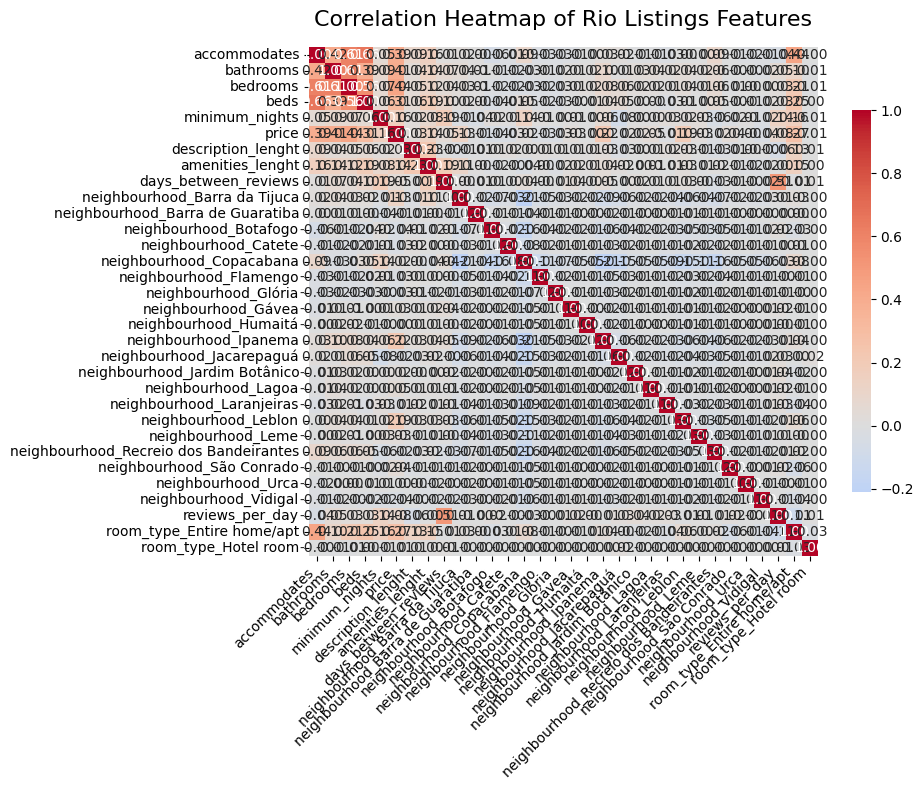

In [ ]:
# Visualize correlation matrix

plt.figure(figsize=(10, 8))

sns.heatmap(
    corr_matrix,
    annot=True,          # show correlation values
    fmt=".2f",           # format with 2 decimals
    cmap="coolwarm",     # colormap: negative=blue, positive=red
    center=0,            # center color scale at 0
    square=True,         # square cells
    cbar_kws={"shrink": 0.75}  # adjust colorbar size
)

# Add a title to the heatmap
plt.title("Correlation Heatmap of Rio Listings Features", fontsize=16, pad=15)

plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# End-to-End Solution Pipeline in PyTorch

## Import

In [ ]:
import numpy as np
import datetime
import torch
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, TensorDataset, DataLoader
from torch.utils.data.dataset import random_split
import torch.optim as optim
import torch.nn as nn
%matplotlib inline
plt.style.use('fivethirtyeight')

## Architecture class

In [ ]:
class Architecture(object):
    def __init__(self, model, loss_fn, optimizer):
        # Here we define the attributes of our class

        # We start by storing the arguments as attributes
        # to use them later
        self.model = model
        self.loss_fn = loss_fn
        self.optimizer = optimizer
        self.device = 'cuda' if torch.cuda.is_available() else 'cpu'
        # Let's send the model to the specified device right away
        self.model.to(self.device)

        # These attributes are defined here, but since they are
        # not informed at the moment of creation, we keep them None
        self.train_loader = None
        self.val_loader = None

        # These attributes are going to be computed internally
        self.losses = []
        self.val_losses = []
        self.total_epochs = 0

        # Creates the train_step function for our model,
        # loss function and optimizer
        # Note: there are NO ARGS there! It makes use of the class
        # attributes directly
        self.train_step_fn = self._make_train_step_fn()
        # Creates the val_step function for our model and loss
        self.val_step_fn = self._make_val_step_fn()

    def to(self, device):
        # This method allows the user to specify a different device
        # It sets the corresponding attribute (to be used later in
        # the mini-batches) and sends the model to the device
        try:
            self.device = device
            self.model.to(self.device)
        except RuntimeError:
            self.device = 'cuda' if torch.cuda.is_available() else 'cpu'
            print(f"Couldn't send it to {device}, sending it to {self.device} instead.")
            self.model.to(self.device)

    def set_loaders(self, train_loader, val_loader=None):
        # This method allows the user to define which train_loader (and val_loader, optionally) to use
        # Both loaders are then assigned to attributes of the class
        # So they can be referred to later
        self.train_loader = train_loader
        self.val_loader = val_loader

    def _make_train_step_fn(self):
        # This method does not need ARGS... it can refer to
        # the attributes: self.model, self.loss_fn and self.optimizer

        # Builds function that performs a step in the train loop
        def perform_train_step_fn(x, y):
            # Sets model to TRAIN mode
            self.model.train()

            # Step 1 - Computes our model's predicted output - forward pass
            yhat = self.model(x)
            # Step 2 - Computes the loss
            loss = self.loss_fn(yhat, y)
            # Step 3 - Computes gradients for both "a" and "b" parameters
            loss.backward()
            # Step 4 - Updates parameters using gradients and the learning rate
            self.optimizer.step()
            self.optimizer.zero_grad()

            # Returns the loss
            return loss.item()

        # Returns the function that will be called inside the train loop
        return perform_train_step_fn

    def _make_val_step_fn(self):
        # Builds function that performs a step in the validation loop
        def perform_val_step_fn(x, y):
            # Sets model to EVAL mode
            self.model.eval()

            # Step 1 - Computes our model's predicted output - forward pass
            yhat = self.model(x)
            # Step 2 - Computes the loss
            loss = self.loss_fn(yhat, y)
            # There is no need to compute Steps 3 and 4, since we don't update parameters during evaluation
            return loss.item()

        return perform_val_step_fn

    def _mini_batch(self, validation=False):
        # The mini-batch can be used with both loaders
        # The argument `validation`defines which loader and
        # corresponding step function is going to be used
        if validation:
            data_loader = self.val_loader
            step_fn = self.val_step_fn
        else:
            data_loader = self.train_loader
            step_fn = self.train_step_fn

        if data_loader is None:
            return None

        # Once the data loader and step function, this is the same
        # mini-batch loop we had before
        mini_batch_losses = []
        for x_batch, y_batch in data_loader:
            x_batch = x_batch.to(self.device)
            y_batch = y_batch.to(self.device)

            mini_batch_loss = step_fn(x_batch, y_batch)
            mini_batch_losses.append(mini_batch_loss)

        loss = np.mean(mini_batch_losses)
        return loss

    def set_seed(self, seed=42):
        torch.backends.cudnn.deterministic = True
        torch.backends.cudnn.benchmark = False
        torch.manual_seed(seed)
        np.random.seed(seed)

    def train(self, n_epochs, seed=42):
        # To ensure reproducibility of the training process
        self.set_seed(seed)

        for epoch in range(n_epochs):
            # Keeps track of the numbers of epochs
            # by updating the corresponding attribute
            self.total_epochs += 1

            # inner loop
            # Performs training using mini-batches
            loss = self._mini_batch(validation=False)
            self.losses.append(loss)

            # VALIDATION
            # no gradients in validation!
            with torch.no_grad():
                # Performs evaluation using mini-batches
                val_loss = self._mini_batch(validation=True)
                self.val_losses.append(val_loss)

    def save_checkpoint(self, filename):
        # Builds dictionary with all elements for resuming training
        checkpoint = {'epoch': self.total_epochs,
                      'model_state_dict': self.model.state_dict(),
                      'optimizer_state_dict': self.optimizer.state_dict(),
                      'loss': self.losses,
                      'val_loss': self.val_losses}

        torch.save(checkpoint, filename)

    def load_checkpoint(self, filename):
        # Loads dictionary
        checkpoint = torch.load(filename,weights_only=False)

        # Restore state for model and optimizer
        self.model.load_state_dict(checkpoint['model_state_dict'])
        self.optimizer.load_state_dict(checkpoint['optimizer_state_dict'])

        self.total_epochs = checkpoint['epoch']
        self.losses = checkpoint['loss']
        self.val_losses = checkpoint['val_loss']

        self.model.train() # always use TRAIN for resuming training

    def predict(self, x):
        # Set is to evaluation mode for predictions
        self.model.eval()
        # Takes aNumpy input and make it a float tensor
        x_tensor = torch.as_tensor(x).float()
        # Send input to device and uses model for prediction
        y_hat_tensor = self.model(x_tensor.to(self.device))
        # Set it back to train mode
        self.model.train()
        # Detaches it, brings it to CPU and back to Numpy
        return y_hat_tensor.detach().cpu().numpy()

    def plot_losses(self):
        fig = plt.figure(figsize=(10, 4))
        plt.plot(self.losses, label='Training Loss', c='b')
        plt.plot(self.val_losses, label='Validation Loss', c='r')
        plt.yscale('log')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
        plt.tight_layout()
        return fig

## Data Preparation

In [ ]:
rio_iqr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19136 entries, 2 to 41946
Data columns (total 32 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   accommodates                            19136 non-null  int64  
 1   bathrooms                               19136 non-null  float64
 2   bedrooms                                19136 non-null  float64
 3   beds                                    19136 non-null  float64
 4   minimum_nights                          19136 non-null  int64  
 5   price                                   19136 non-null  float64
 6   description_lenght                      19136 non-null  int64  
 7   amenities_lenght                        19136 non-null  int64  
 8   days_between_reviews                    19136 non-null  int64  
 9   neighbourhood_Barra da Tijuca           19136 non-null  int64  
 10  neighbourhood_Barra de Guaratiba        19136 non-null  int64  

In [ ]:
# ---------------------------------------------------------------------
# 1) Extract features (X) and target (y) from the DataFrame
# ---------------------------------------------------------------------

# Keep all numeric feature columns except the target 'price'
feature_cols = [c for c in rio_iqr.columns if c != "price"]
target_col   = "price"

# Convert to NumPy arrays (float32 is ideal for PyTorch)
X = rio_iqr[feature_cols].to_numpy(dtype=np.float32)     # shape (N, D)
y = rio_iqr[target_col].to_numpy(dtype=np.float32).reshape(-1, 1)  # shape (N, 1)

# Quick sanity checks
assert not np.isnan(X).any(), "Found NaNs in X. Clean/impute before training."
assert not np.isnan(y).any(), "Found NaNs in y. Clean/impute before training."

In [ ]:
target_columns

['accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'minimum_nights',
 'price',
 'description_lenght',
 'amenities_lenght',
 'days_between_reviews',
 'neighbourhood_Barra da Tijuca',
 'neighbourhood_Barra de Guaratiba',
 'neighbourhood_Botafogo',
 'neighbourhood_Catete',
 'neighbourhood_Copacabana',
 'neighbourhood_Flamengo',
 'neighbourhood_Glória',
 'neighbourhood_Gávea',
 'neighbourhood_Humaitá',
 'neighbourhood_Ipanema',
 'neighbourhood_Jacarepaguá',
 'neighbourhood_Jardim Botânico',
 'neighbourhood_Lagoa',
 'neighbourhood_Laranjeiras',
 'neighbourhood_Leblon',
 'neighbourhood_Leme',
 'neighbourhood_Recreio dos Bandeirantes',
 'neighbourhood_São Conrado',
 'neighbourhood_Urca',
 'neighbourhood_Vidigal',
 'reviews_per_day',
 'room_type_Entire home/apt',
 'room_type_Hotel room']

In [ ]:
# ---------------------------------------------------------------------
# 2) Build tensors BEFORE splitting (as you requested)
# ---------------------------------------------------------------------

torch.manual_seed(13)

x_tensor = torch.as_tensor(X).float()   # (N, D)
y_tensor = torch.as_tensor(y).float()   # (N, 1)

# Whole dataset
dataset = TensorDataset(x_tensor, y_tensor)

In [ ]:
# ---------------------------------------------------------------------
# 3) Train/validation split using PyTorch's random_split
# ---------------------------------------------------------------------

n_total = len(dataset)
n_train = int(n_total * 0.70)
n_val = int(n_total * 0.15)
n_test = n_total - n_train - n_val
train_data, val_data, test_data = random_split(dataset, [n_train, n_val, n_test])

In [ ]:
type(train_data)

torch.utils.data.dataset.Subset

In [ ]:
type(val_data)

torch.utils.data.dataset.Subset

In [ ]:
# ---------------------------------------------------------------------
# Min-Max without leakage
# ---------------------------------------------------------------------
from torch.utils.data import Subset

# 0) Get split indices produced by random_split (already done above)
train_idx = train_data.indices
val_idx   = val_data.indices

# Compute min/max ONLY on training subset
x_min = x_tensor[train_idx].min(dim=0).values
x_max = x_tensor[train_idx].max(dim=0).values
x_range = x_max - x_min

y_min = y_tensor[train_idx].min(dim=0).values
y_max = y_tensor[train_idx].max(dim=0).values
y_range = y_max - y_min

# Handle cases where range is zero (constant feature)
eps = 1e-8
x_range = torch.where(x_range < eps, torch.ones_like(x_range), x_range)
y_range = torch.where(y_range < eps, torch.ones_like(y_range), y_range)


# Apply min-max scaling to ALL features using training stats
x_tensor_norm = (x_tensor - x_min) / x_range
y_tensor_norm = (y_tensor - y_min) / y_range


# Rebuild dataset with normalized features
dataset_norm  = TensorDataset(x_tensor_norm, y_tensor_norm)
train_data = Subset(dataset_norm, train_idx)
val_data   = Subset(dataset_norm, val_idx)
test_data = Subset(dataset_norm, test_data.indices)

In [ ]:
# 4) Recreate the DataLoaders
batch_size  = 16
train_loader = DataLoader(dataset=train_data, batch_size=batch_size, shuffle=True)
val_loader   = DataLoader(dataset=val_data,   batch_size=batch_size)
test_loader = DataLoader(dataset= test_data, batch_size=batch_size)


# Quick peek to confirm shapes
xb, yb = next(iter(train_loader))
print(f"Train batch X: {xb.shape} | y: {yb.shape}")  # e.g., (16, D) and (16, 1)

Train batch X: torch.Size([16, 31]) | y: torch.Size([16, 1])


## Model Configuration

In [ ]:
# 5) (Optional but safer) Make model input dimension dynamic
# Sets learning rate
lr = 0.001
torch.manual_seed(42)
D = x_tensor.shape[1]  # number of features
model = nn.Sequential(nn.Linear(D, 1))
optimizer = optim.SGD(model.parameters(), lr=lr)
loss_fn = nn.MSELoss(reduction='mean')

## Training with SGD

In [ ]:
target_columns

['accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'minimum_nights',
 'price',
 'description_lenght',
 'amenities_lenght',
 'days_between_reviews',
 'neighbourhood_Barra da Tijuca',
 'neighbourhood_Barra de Guaratiba',
 'neighbourhood_Botafogo',
 'neighbourhood_Catete',
 'neighbourhood_Copacabana',
 'neighbourhood_Flamengo',
 'neighbourhood_Glória',
 'neighbourhood_Gávea',
 'neighbourhood_Humaitá',
 'neighbourhood_Ipanema',
 'neighbourhood_Jacarepaguá',
 'neighbourhood_Jardim Botânico',
 'neighbourhood_Lagoa',
 'neighbourhood_Laranjeiras',
 'neighbourhood_Leblon',
 'neighbourhood_Leme',
 'neighbourhood_Recreio dos Bandeirantes',
 'neighbourhood_São Conrado',
 'neighbourhood_Urca',
 'neighbourhood_Vidigal',
 'reviews_per_day',
 'room_type_Entire home/apt',
 'room_type_Hotel room']

In [ ]:
n_epochs = 100
arch = Architecture(model, loss_fn, optimizer)
arch.set_seed(42)
arch.set_loaders(train_loader, val_loader)
arch.train(n_epochs=n_epochs)

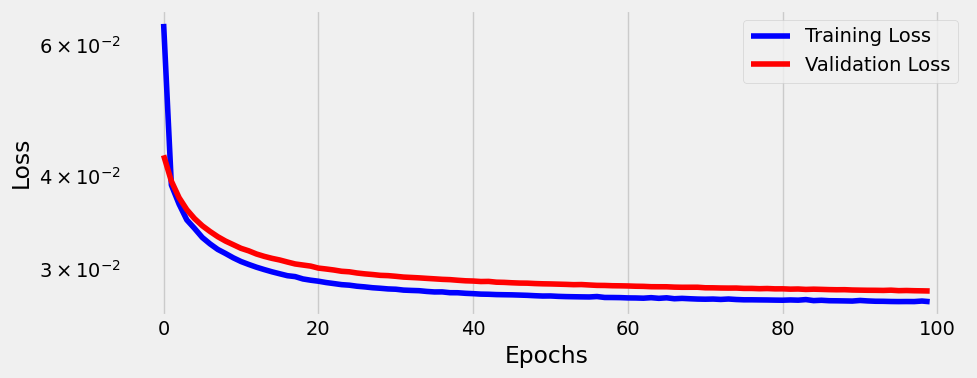

In [ ]:
fig = arch.plot_losses()

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

arch.model.eval()

predictions = []
true_values = []

with torch.no_grad():
  for x_batch, y_batch in test_loader:
    # Envia os dados para o dispositivo (CPU/GPU)
    x_batch = x_batch.to(arch.device)

    # Faz a predição (ainda na escala normalizada 0-1)
    y_hat_batch = arch.model(x_batch)

    # Guarda as previsões e os valores reais
    # .cpu() move o tensor para a CPU antes de adicioná-lo à lista
    predictions.append(y_hat_batch.cpu())
    true_values.append(y_batch.cpu())

# Concatena todos os lotes de previsões em um único tensor
predictions = torch.cat(predictions, dim=0)
true_values = torch.cat(true_values, dim=0)

# Desnormalização
predictions_unscaled = predictions * y_range + y_min
true_values_unscaled = true_values * y_range + y_min

# Converter para NumPy
y_pred_np = predictions_unscaled.numpy()
y_true_np = true_values_unscaled.numpy()

rmse = np.sqrt(mean_squared_error(y_true_np, y_pred_np))

print(rmse)

153.8366943080389


In [ ]:
# # Example: one new sample with 7 features (same order as feature_cols)
# X_new = np.array([[2.0, 1.0, 2.0, 2.0, 30.0, 50.0, 100.0]], dtype=np.float32)
# # (this is just a made-up input)

# # -------------------------------------------------------------
# # 1) Apply the SAME feature normalization
# # -------------------------------------------------------------
# X_new_t = torch.as_tensor(X_new)
# X_new_norm = (X_new_t - x_min) / x_range

# # -------------------------------------------------------------
# # 2) Predict with your trained Architecture
# # -------------------------------------------------------------
# y_pred_norm = arch.predict(X_new_norm.numpy())   # prediction in standardized space of y

# # -------------------------------------------------------------
# # 3) Revert target normalization back to original units
# # -------------------------------------------------------------
# y_pred_real = y_pred_norm * y_range.item() + y_min.item()

# # Convert to scalar
# y_pred_real_value = float(y_pred_real.squeeze())

# print(f"Predicted price: R$ {y_pred_real_value:.2f}")

In [ ]:
rio_iqr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19136 entries, 2 to 41946
Data columns (total 32 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   accommodates                            19136 non-null  int64  
 1   bathrooms                               19136 non-null  float64
 2   bedrooms                                19136 non-null  float64
 3   beds                                    19136 non-null  float64
 4   minimum_nights                          19136 non-null  int64  
 5   price                                   19136 non-null  float64
 6   description_lenght                      19136 non-null  int64  
 7   amenities_lenght                        19136 non-null  int64  
 8   days_between_reviews                    19136 non-null  int64  
 9   neighbourhood_Barra da Tijuca           19136 non-null  int64  
 10  neighbourhood_Barra de Guaratiba        19136 non-null  int64  

## Training with adam

In [ ]:
lr = 0.001
torch.manual_seed(42)
D = x_tensor.shape[1]  # number of features
model = nn.Sequential(nn.Linear(D, 1))
optimizer = optim.Adam(model.parameters(), lr=lr)
loss_fn = nn.MSELoss(reduction='mean')

In [ ]:
n_epochs = 100
arch = Architecture(model, loss_fn, optimizer)
arch.set_seed(42)
arch.set_loaders(train_loader, val_loader)
arch.train(n_epochs=n_epochs)

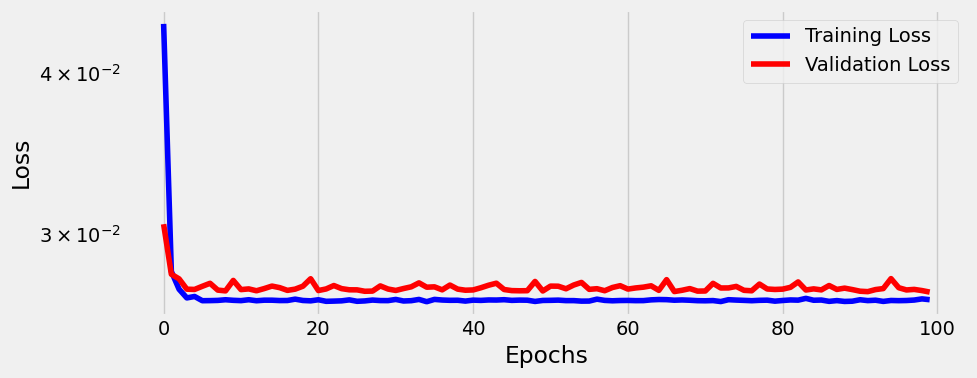

In [ ]:
fig = arch.plot_losses()

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

arch.model.eval()

predictions = []
true_values = []

with torch.no_grad():
  for x_batch, y_batch in test_loader:
    # Envia os dados para o dispositivo (CPU/GPU)
    x_batch = x_batch.to(arch.device)

    # Faz a predição (ainda na escala normalizada 0-1)
    y_hat_batch = arch.model(x_batch)

    # Guarda as previsões e os valores reais
    # .cpu() move o tensor para a CPU antes de adicioná-lo à lista
    predictions.append(y_hat_batch.cpu())
    true_values.append(y_batch.cpu())

# Concatena todos os lotes de previsões em um único tensor
predictions = torch.cat(predictions, dim=0)
true_values = torch.cat(true_values, dim=0)

# Desnormalização
predictions_unscaled = predictions * y_range + y_min
true_values_unscaled = true_values * y_range + y_min

# Converter para NumPy
y_pred_np = predictions_unscaled.numpy()
y_true_np = true_values_unscaled.numpy()

rmse = np.sqrt(mean_squared_error(y_true_np, y_pred_np))

print(rmse)

151.4531693296644


In [ ]:
target_columns

['accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'minimum_nights',
 'price',
 'description_lenght',
 'amenities_lenght',
 'days_between_reviews',
 'neighbourhood_Barra da Tijuca',
 'neighbourhood_Barra de Guaratiba',
 'neighbourhood_Botafogo',
 'neighbourhood_Catete',
 'neighbourhood_Copacabana',
 'neighbourhood_Flamengo',
 'neighbourhood_Glória',
 'neighbourhood_Gávea',
 'neighbourhood_Humaitá',
 'neighbourhood_Ipanema',
 'neighbourhood_Jacarepaguá',
 'neighbourhood_Jardim Botânico',
 'neighbourhood_Lagoa',
 'neighbourhood_Laranjeiras',
 'neighbourhood_Leblon',
 'neighbourhood_Leme',
 'neighbourhood_Recreio dos Bandeirantes',
 'neighbourhood_São Conrado',
 'neighbourhood_Urca',
 'neighbourhood_Vidigal',
 'reviews_per_day',
 'room_type_Entire home/apt',
 'room_type_Hotel room']

In [ ]:
# # Example: one new sample with 7 features (same order as feature_cols)
# X_new = np.array([[2.0, 1.0, 2.0, 2.0, 30.0, 50.0, 100.0]], dtype=np.float32)
# # (this is just a made-up input)

# # -------------------------------------------------------------
# # 1) Apply the SAME feature normalization
# # -------------------------------------------------------------
# X_new_t = torch.as_tensor(X_new)
# X_new_norm = (X_new_t - x_min) / x_range

# # -------------------------------------------------------------
# # 2) Predict with your trained Architecture
# # -------------------------------------------------------------
# y_pred_norm = arch.predict(X_new_norm.numpy())   # prediction in standardized space of y

# # -------------------------------------------------------------
# # 3) Revert target normalization back to original units
# # -------------------------------------------------------------
# y_pred_real = y_pred_norm * y_range.item() + y_min.item()

# # Convert to scalar
# y_pred_real_value = float(y_pred_real.squeeze())

# print(f"Predicted price: R$ {y_pred_real_value:.2f}")